# Projeto Programming - Regressão Linear

Regressão Linear Simples : f_wb = w * x + b

Regressão Linear Múltipla: f_wb = $\overrightarrow{w}$ . $\overrightarrow{x}$ + b

## Criação do dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_dataset(n_points, dimensions = 2, mean = 5, std_dev = 2):

    points = np.random.normal(loc= mean, scale= std_dev, size= (n_points, dimensions))        # Gera n_points vetores com dimensions colunas

    return np.vstack(points)

In [3]:
# Criação do dataset

dataset = generate_dataset(500, dimensions = 2)

## Iniciação da Regressão

In [4]:
def initial_lin_reg(x, y):

    if x.ndim == 1:                                         # Se tivermos apenas 1 variável independente

        w, b = np.random.randint(1, 3, 2)                   # Gerar coeficientes de w e b (de 1 a 3)

        y_hats = w * x + b                                  # Fazer previsões de y dado o w e b definidos acima

        plt.scatter(x, y)
        plt.plot(x, y_hats, color = 'red')

        print(f'A representação inicial de y_hat = {w} x + {b}')

    else:                                                   # Se tivermos mais do que 1 variável independente

        w = np.random.randint(1,3,x.shape[1])               # Gerar coeficientes de w de 1 a 3 para cada variável independente

        b = np.random.randint(1, 3)                         # Gerar o coeficiente de b de 1 a 3

        y_hats = np.dot(x, w) + b

        formula_regressao = " + ".join([f"{w[i]}*x{i+1}" for i in range(len(w))]) if len(w) > 1 else f"{w[0]}x + {b}"
        print(f'A representação inicial de y_hat = {formula_regressao} + {b}')

    return x, y, w, b

A representação inicial de y_hat = 1 x + 1


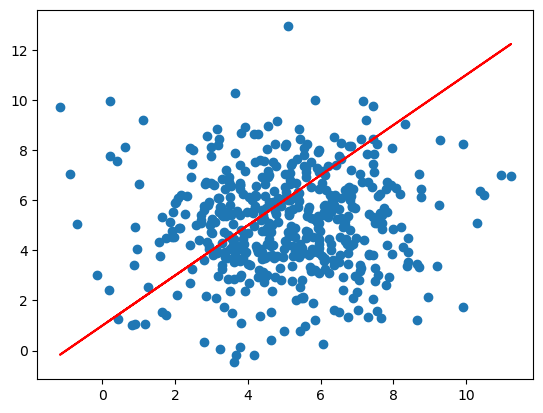

In [5]:
# Exemplo para testar a função initial_lin_reg


# x, y, w, b = initial_lin_reg(dataset[:, :-1], dataset[:, -1])           # Caso tenhamos + do que 1 variável independente

x, y, w, b = initial_lin_reg(dataset[:,0], dataset[:,1])                # Caso tenhamos apenas 1 variável independente

## Definição da função de custo - Mean Squared Error Function

In [6]:
def cost_function(x, y, w, b):

    m = len(x)                                              # Número de data points

    if x.ndim == 1:
        
        y_hats = w * x + b                                  # Previsões de y caso a regressão seja simples
    
    else:

        y_hats = np.dot(x, w) + b                           # Previsões de y caso a regressão seja múltipla    

    cost = (1/(2*m)) * np.sum((y_hats - y) ** 2)            # Função custo

    return cost

In [7]:
initial_cost = cost_function(x, y, w, b)
print(f'O custo da regressão para w = {w} e b = {b} é de {initial_cost}.')

O custo da regressão para w = 1 e b = 1 é de 4.328251463569895.


## Iniciação do Gradiente Descendente

In [8]:
def gradient_descent(x, y, w, b, learning_rate = 0.01, n_iterations = 10000, min_error = 1e-6, min_update = 1e-6):

    m = len(x)                                              # Número de data points
    cost = []
    prev_w, prev_b = w.copy(), b                            # Guardar os valores anteriores de w e b

    for i in range(n_iterations):

        if x.ndim == 1:
            
            y_hats = w * x + b
            dcdw = (1/m) * np.sum((y_hats - y) * x)         # Derivada da cost function em relação a w
        else: 
            
            y_hats = np.dot(x, w) + b
            dcdw = (1/m) * np.dot(x.T, (y_hats - y))        # Derivada da cost function em relação a w quando temos mais do que 1 variável indep.

        dcdb = (1/m) * np.sum(y_hats - y)                   # Derivada da cost function em relação a b

        w = w - learning_rate * dcdw                        # Atualização de w

        b = b - learning_rate * dcdb                        # Atualização de b

        current_cost = cost_function(x, y, w, b)
        cost.append(current_cost)

        if current_cost < min_error:
            print(f'Paragem na iteração {i + 1} porque a função custo atual ({current_cost}) já não é superior a {min_error}.')
            break
        
        if np.all(np.abs(w - prev_w) < min_update) and np.abs(b - prev_b) < min_update:
            print(f'Paragem na iteração {i + 1} porque as alterações em w e b já não são maiores do que {min_update}.')
            break

        prev_w, prev_b = w.copy(), b
    
    else:
        print(f'Paragem porque atingiu o número máximo de iterações: {i + 1}')

    return w, b, cost

In [9]:
w_optimal, b_optimal, cost_history = gradient_descent(x, y, w, b)

Paragem na iteração 6474 porque as alterações em w e b já não são maiores do que 1e-06.


O ótimo da regressão está definido em y_hat = 0.040066723854083795 x + 4.876942920565579


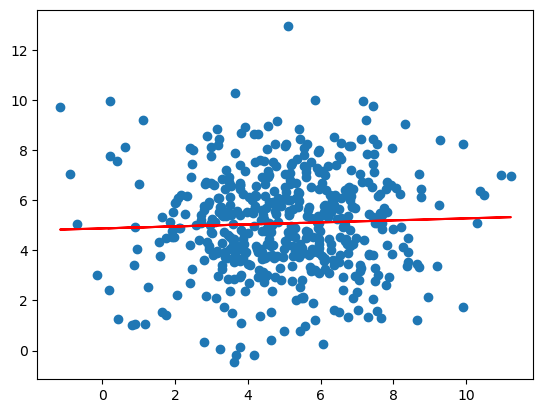

In [10]:
if x.ndim == 1:

    print(f'O ótimo da regressão está definido em y_hat = {w_optimal} x + {b_optimal}')

    plt.scatter(x, y)
    plt.plot(x, w_optimal* x + b_optimal, color = 'red')

else:
    formula_regressao = " + ".join([f"{w_optimal[i]}*x{i+1}" for i in range(len(w_optimal))]) if len(w_optimal) > 1 else f"{w_optimal[0]}x + {b_optimal}"
    print(f'O ótimo da regressão está definido em y_hat = {formula_regressao} + {b_optimal}')

# Regressão Linear

In [11]:
def linear_regression(x, y, learning_rate = 0.01, n_iterations = 10000, min_error = 1e-6, min_update = 1e-6):
    """ 
    """

    def initial_lin_reg(x):
        if x.ndim == 1:                                         # Se tivermos apenas 1 variável independente
            w, b = np.random.randint(1, 3, 2)                   # Gerar coeficientes de w e b (de 1 a 3)
            y_hats = w * x + b                                  # Fazer previsões de y dado o w e b definidos acima

        else:                                                   # Se tivermos mais do que 1 variável independente
            w = np.random.randint(1,3,x.shape[1])               # Gerar coeficientes de w de 1 a 3 para cada variável independente
            b = np.random.randint(1, 3)                         # Gerar o coeficiente de b de 1 a 3
            y_hats = np.dot(x, w) + b

        return w, b
    
    def cost_function(x, y, w, b):
        m = len(x)                                              # Número de data points
        if x.ndim == 1:
            y_hats = w * x + b                                  # Previsões de y caso a regressão seja simples
        
        else:
            y_hats = np.dot(x, w) + b                           # Previsões de y caso a regressão seja múltipla    
        cost = (1/(2*m)) * np.sum((y_hats - y) ** 2)            # Função custo

        return cost
    
    def gradient_descent(x, y, w, b, learning_rate, n_iterations, min_error, min_update):
        m = len(x)                                              # Número de data points
        cost_hist = []
        prev_w, prev_b = w.copy(), b                            # Guardar os valores anteriores de w e b

        for i in range(n_iterations):
            if x.ndim == 1:
                y_hats = w * x + b
                dcdw = (1/m) * np.sum((y_hats - y) * x)         # Derivada da cost function em relação a w

            else: 
                y_hats = np.dot(x, w) + b
                dcdw = (1/m) * np.dot(x.T, (y_hats - y))        # Derivada da cost function em relação a w quando temos mais do que 1 variável indep.
            dcdb = (1/m) * np.sum(y_hats - y)                   # Derivada da cost function em relação a b
            w = w - learning_rate * dcdw                        # Atualização de w
            b = b - learning_rate * dcdb                        # Atualização de b

            current_cost = cost_function(x, y, w, b)
            cost_hist.append(current_cost)

            if current_cost < min_error:
                break
            if np.all(np.abs(w - prev_w) < min_update) and np.abs(b - prev_b) < min_update:
                break

            prev_w, prev_b = w.copy(), b

        return w, b, cost_hist
    
    if x.ndim == 1:
        print(f'O ótimo da regressão está definido em y_hat = {w_optimal} x + {b_optimal}')
        plt.scatter(x, y)
        plt.plot(x, w_optimal* x + b_optimal, color = 'red')
        plt.title('Representação final do dataset e regressão')

    else:
        formula_regressao = " + ".join([f"{w_optimal[i]}*x{i+1}" for i in range(len(w_optimal))]) if len(w_optimal) > 1 else f"{w_optimal[0]}x + {b_optimal}"
        print(f'O ótimo da regressão está definido em y_hat = {formula_regressao} + {b_optimal}')
    
    return w, b, cost_history
    

O ótimo da regressão está definido em y_hat = 0.040066723854083795 x + 4.876942920565579


[2.042251803720739,
 2.0422518036130857,
 2.042251803505717,
 2.042251803398631,
 2.042251803291828,
 2.042251803185307,
 2.0422518030790666,
 2.0422518029731074,
 2.042251802867428,
 2.042251802762027,
 2.0422518026569043,
 2.0422518025520593,
 2.042251802447491,
 2.042251802343199,
 2.042251802239182,
 2.0422518021354397,
 2.042251802031971,
 2.0422518019287756,
 2.0422518018258526,
 2.0422518017232014]

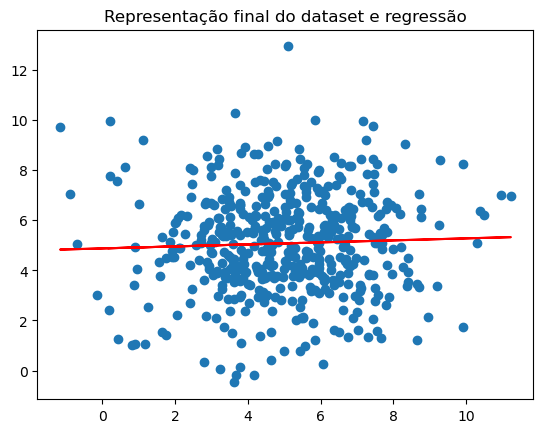

In [12]:
w_final, b_final, cost_history = linear_regression(dataset[:,0], dataset[:,1])

cost_history[-20:]